<a href="https://colab.research.google.com/github/tanyavijj/edtech-project/blob/main/msvd_Untitled33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import torch
import tarfile
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from transformers import CLIPModel, CLIPProcessor, CLIPTokenizer
from IPython.display import display

In [ ]:
# Define Paths - Change This Based on Your Drive Location
base_folder = "/content/drive/MyDrive/iit data/"
tar_file = os.path.join(base_folder, "YouTubeClips.tar")
annotation_file = os.path.join(base_folder, "annotations.txt")
frame_output_folder = os.path.join(base_folder, "frames")

In [ ]:
# Extract TAR File if Not Already Extracted
if not os.path.exists(frame_output_folder):
    os.makedirs(frame_output_folder, exist_ok=True)
    with tarfile.open(tar_file, "r") as tar:
        tar.extractall(path=frame_output_folder)
    print(f"Extracted TAR file to {frame_output_folder}")
else:
    print("Frames folder already exists.")

Frames folder already exists.


In [ ]:
#  Extract Frames from Videos
def extract_frames(video_folder, output_folder, fps=1):
    os.makedirs(output_folder, exist_ok=True)

    for video_file in os.listdir(video_folder):
        if video_file.endswith(".mp4") or video_file.endswith(".avi"):
            video_path = os.path.join(video_folder, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
            frame_id = 0

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_id % frame_rate == 0:  # Extract 1 frame per second
                    frame_filename = os.path.join(output_folder, f"{video_file.split('.')[0]}_frame_{frame_id}.jpg")
                    cv2.imwrite(frame_filename, frame)
                frame_id += 1

            cap.release()
            print(f" Frames extracted for {video_file}")

In [ ]:
#  Run Frame Extraction
extract_frames(frame_output_folder, frame_output_folder)

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/iit data/"))


['YouTubeClips.tar', 'videos', 'frames', 'annotations.txt', 'image_captions.csv', 'captions.csv']


In [ ]:
import os

frame_output_folder = "/content/drive/MyDrive/iit data/frames"
frame_files = os.listdir(frame_output_folder)

if len(frame_files) == 0:
    print(" No frames found! Frame extraction failed.")
else:
    print(f" {len(frame_files)} frames found.")
    print("First 5 frame files:", frame_files[:5])  # Print first few extracted frames


 20929 frames found.
First 5 frame files: ['htWPOGTagec_2_18_frame_870.jpg', 'htWPOGTagec_2_18_frame_928.jpg', 'ht2oIYBSoI0_9_21_frame_0.jpg', 'ht2oIYBSoI0_9_21_frame_25.jpg', 'ht2oIYBSoI0_9_21_frame_50.jpg']


In [ ]:
import os

video_folder = "/content/drive/MyDrive/iit data/videos"
videos = os.listdir(video_folder)

if len(videos) == 0:
    print(" No videos found! Extraction failed.")
else:
    print(f" {len(videos)} videos found.")
    print(" First 5 videos:", videos[:5])  # Show first few videos

 1 videos found.
 First 5 videos: ['YouTubeClips']


In [ ]:
import os

video_path = "/content/drive/MyDrive/iit data/videos/YouTubeClips"

if os.path.isdir(video_path):
    print("'YouTubeClips' is a folder. Checking contents...")
    print(os.listdir(video_path)[:5])  # Show first 5 files inside
elif os.path.isfile(video_path):
    print(" 'YouTubeClips' is a single file! Needs extraction.")
else:
    print(" 'YouTubeClips' does not exist.")

'YouTubeClips' is a folder. Checking contents...
['jCplbayVbtw_10_20.avi', 'jCplbayVbtw_28_38.avi', 'jcRCn7MeSbo_71_82.avi', 'jdAbpLooDgM_10_15.avi', 'Je3V7U5Ctj4_488_495.avi']


In [ ]:
#  Check Extracted Frames
frame_files = os.listdir(frame_output_folder)
if len(frame_files) == 0:
    print("No frames found! Check extraction process.")
else:
    print(f"{len(frame_files)} frames found.")
    print(frame_files[:5])  # Print first 5 frame names

20929 frames found.
['htWPOGTagec_2_18_frame_870.jpg', 'htWPOGTagec_2_18_frame_928.jpg', 'ht2oIYBSoI0_9_21_frame_0.jpg', 'ht2oIYBSoI0_9_21_frame_25.jpg', 'ht2oIYBSoI0_9_21_frame_50.jpg']


In [ ]:
video_folder = "/content/drive/MyDrive/iit data/videos/YouTubeClips"

In [ ]:
extract_frames(video_folder, frame_output_folder)

 Frames extracted for jCplbayVbtw_10_20.avi
 Frames extracted for jCplbayVbtw_28_38.avi
 Frames extracted for jcRCn7MeSbo_71_82.avi
 Frames extracted for jdAbpLooDgM_10_15.avi
 Frames extracted for Je3V7U5Ctj4_488_495.avi
 Frames extracted for jDFn-1lXJ98_71_80.avi
 Frames extracted for Je3V7U5Ctj4_504_511.avi
 Frames extracted for jD4o_Lmy6bU_117_137.avi
 Frames extracted for Je3V7U5Ctj4_558_563.avi
 Frames extracted for Je3V7U5Ctj4_569_576.avi
 Frames extracted for Je3V7U5Ctj4_582_587.avi
 Frames extracted for Je3V7U5Ctj4_634_639.avi
 Frames extracted for Je3V7U5Ctj4_760_765.avi
 Frames extracted for Je3V7U5Ctj4_768_773.avi
 Frames extracted for jfrrO5K_vKM_55_65.avi
 Frames extracted for Je3V7U5Ctj4_956_961.avi
 Frames extracted for Je3V7U5Ctj4_997_1004.avi
 Frames extracted for Jfu-WkuCgD0_140_150.avi
 Frames extracted for JhCvLmf9yr0_46_50.avi
 Frames extracted for JIKaIriiK8w_0_15.avi
 Frames extracted for jI58q6rcNLc_8_18.avi
 Frames extracted for Jj4uYHr65H8_28_35.avi
 Frames e

In [ ]:
import os

def create_caption_mapping(annotation_file, frame_output_folder):
    # Step 1: Load all frame names once (FAST lookup with a dictionary)
    frame_dict = {os.path.splitext(frame)[0]: frame for frame in os.listdir(frame_output_folder)}
    captions = {}

    # Step 2: Process annotations
    with open(annotation_file, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 2:
                video_file = parts[0].strip()
                caption = parts[1].strip()
                frame_prefix = os.path.splitext(video_file)[0]

                # Instead of looping, just check if frame exists in dictionary
                if frame_prefix in frame_dict:
                    captions[frame_dict[frame_prefix]] = caption

    print(f"Captions mapped: {len(captions)} frames found.")
    return captions

# Run function
captions = create_caption_mapping("/content/drive/MyDrive/iit data/annotations.txt",
                                  "/content/drive/MyDrive/iit data/frames")


Captions mapped: 0 frames found.


In [ ]:
# Save Captions to CSV
df = pd.DataFrame(list(captions.items()), columns=["Frame", "Caption"])
df.to_csv(os.path.join(base_folder, "captions.csv"), index=False)
print(f"Captions saved to {base_folder}captions.csv")

Captions saved to /content/drive/MyDrive/iit data/captions.csv


In [ ]:
# Load CLIP Model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Preprocessing Functions
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    return img_tensor

def preprocess_text(text):
    tokens = tokenizer(text, return_tensors="pt")["input_ids"]
    return tokens

In [ ]:
# Image Search Function
def image_search(query, frame_folder=frame_output_folder, top_k=5):
    query_tokens = preprocess_text(query)
    text_features = model.get_text_features(input_ids=query_tokens)

    frame_scores = []

    for frame in os.listdir(frame_folder):
        if frame.endswith(".jpg"):
            img_path = os.path.join(frame_folder, frame)
            img_tensor = preprocess_image(img_path)
            image_features = model.get_image_features(pixel_values=img_tensor)
            similarity = torch.cosine_similarity(image_features, text_features)
            frame_scores.append((frame, similarity.item(), img_path))

    frame_scores.sort(key=lambda x: x[1], reverse=True)
    top_results = frame_scores[:top_k]

    print("\n**Top Search Results:**")
    for frame, score, img_path in top_results:
        print(f" {frame} - Similarity: {score:.4f} - Path: {img_path}")

        try:
            img = Image.open(img_path)
            display(img)  # Show image inside Colab
        except Exception as e:
            print(f"Error displaying image: {e}")


**Top Search Results:**
 vZa13vJugGU_0_30_frame_90.jpg - Similarity: 0.3167 - Path: /content/drive/MyDrive/iit data/frames/vZa13vJugGU_0_30_frame_90.jpg


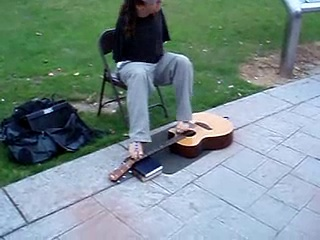

 vZa13vJugGU_0_30_frame_0.jpg - Similarity: 0.3153 - Path: /content/drive/MyDrive/iit data/frames/vZa13vJugGU_0_30_frame_0.jpg


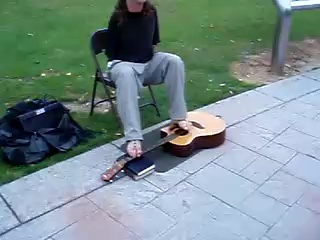

 vZa13vJugGU_0_30_frame_300.jpg - Similarity: 0.3153 - Path: /content/drive/MyDrive/iit data/frames/vZa13vJugGU_0_30_frame_300.jpg


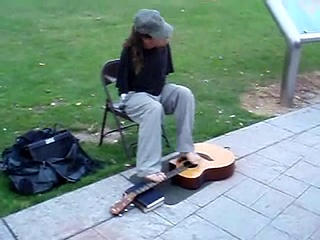

 vZa13vJugGU_0_30_frame_135.jpg - Similarity: 0.3150 - Path: /content/drive/MyDrive/iit data/frames/vZa13vJugGU_0_30_frame_135.jpg


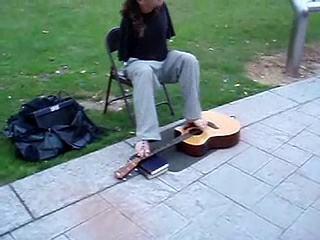

 7_XASfcYdBk_3_13_frame_0.jpg - Similarity: 0.3148 - Path: /content/drive/MyDrive/iit data/frames/7_XASfcYdBk_3_13_frame_0.jpg


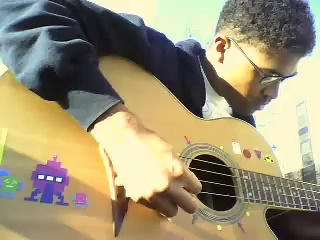

In [ ]:
# Run an Example Search Query
image_search("A person playing guitar")